In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

%matplotlib inline

In [2]:
# dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [3]:
qtd, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
print(X.shape)

(1140, 2914)


In [4]:
# labels
tam_por_pessoa = 10 #target_names.shape[0]
powells = np.where(y==0)[0][:tam_por_pessoa]
rumsfelds = np.where(y==1)[0][:tam_por_pessoa]
bushs = np.where(y==2)[0][:tam_por_pessoa]
schroeders = np.where(y==3)[0][:tam_por_pessoa]
blairs = np.where(y==4)[0][:tam_por_pessoa]
indexes = np.hstack([powells, rumsfelds, bushs, schroeders, blairs])

for i, name in enumerate(target_names):
    print(i, ": ", name)

0 :  Colin Powell
1 :  Donald Rumsfeld
2 :  George W Bush
3 :  Gerhard Schroeder
4 :  Tony Blair


In [5]:
# subset
subset = X[indexes]
y_subset = y[indexes]
print(subset)

[[135.33333  140.       145.66667  ...  90.666664  31.333334  22.333334]
 [ 79.        84.666664  80.333336 ... 249.66667  249.66667  225.      ]
 [ 54.333332  56.        57.       ... 126.333336  94.        37.      ]
 ...
 [ 91.666664  97.666664 108.333336 ...  38.        35.333332  31.666666]
 [ 52.333332  61.        54.666668 ... 228.33333  230.33333  234.      ]
 [ 54.        51.        63.333332 ... 231.33333  227.       180.      ]]


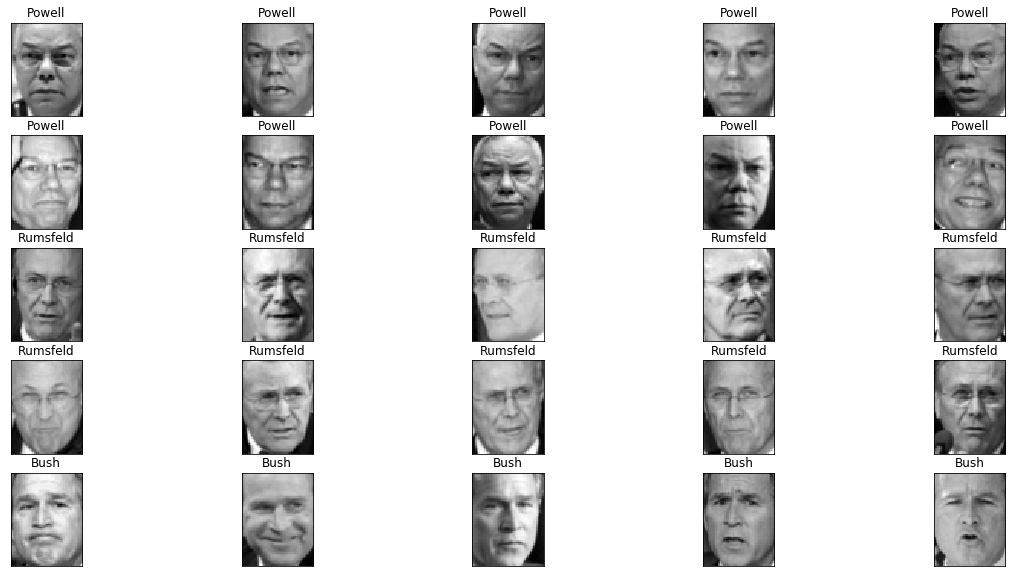

In [33]:
def plot_gallery(images, titles, h, w, rows=5, cols=5):
    plt.figure(figsize=(20,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_title, target_names):
    for i in range(y_title.shape[0]):
        title = target_names[y_title[i]].split(' ')[-1]
        yield '{0}'.format(title)

prediction_titles = list(titles(y_subset, target_names))
plot_gallery(subset, prediction_titles, h, w)

In [7]:
C = subset.T.dot(subset)
print(C.shape)
print("\nC:", C)

u,s, v = np.linalg.svd(C)
print("\ns:", s, "\nv:", v)

(2914, 2914)

C: [[ 421568.38  436259.1   452714.5  ...  457042.34  448361.56  430662.22]
 [ 436259.1   459152.28  482040.66 ...  471927.22  465099.9   446213.88]
 [ 452714.5   482040.66  514662.   ...  495487.72  489401.1   465689.9 ]
 ...
 [ 457042.34  471927.22  495487.72 ... 1088656.4  1086044.6  1009441.44]
 [ 448361.56  465099.9   489401.1  ... 1086044.6  1118348.   1059711.  ]
 [ 430662.22  446213.88  465689.9  ... 1009441.44 1059711.   1039825.  ]]

s: [2.7262285e+09 3.4061764e+07 1.9006336e+07 ... 1.3691387e-03 1.1052475e-03
 1.2158520e-04] 
v: [[-0.01113015 -0.01170804 -0.01246212 ... -0.01680142 -0.0167541
  -0.01592886]
 [-0.02094962 -0.01899809 -0.01817401 ...  0.01173149  0.01895309
   0.02219177]
 [-0.02449677 -0.02999968 -0.03345417 ...  0.0924441   0.09703887
   0.09286898]
 ...
 [-0.01364695 -0.01474747 -0.03333726 ... -0.00077302 -0.02361515
  -0.02312134]
 [-0.011693    0.00781763  0.01318794 ... -0.00454899  0.01597275
  -0.01245773]
 [-0.0198902  -0.01134753 -0.00

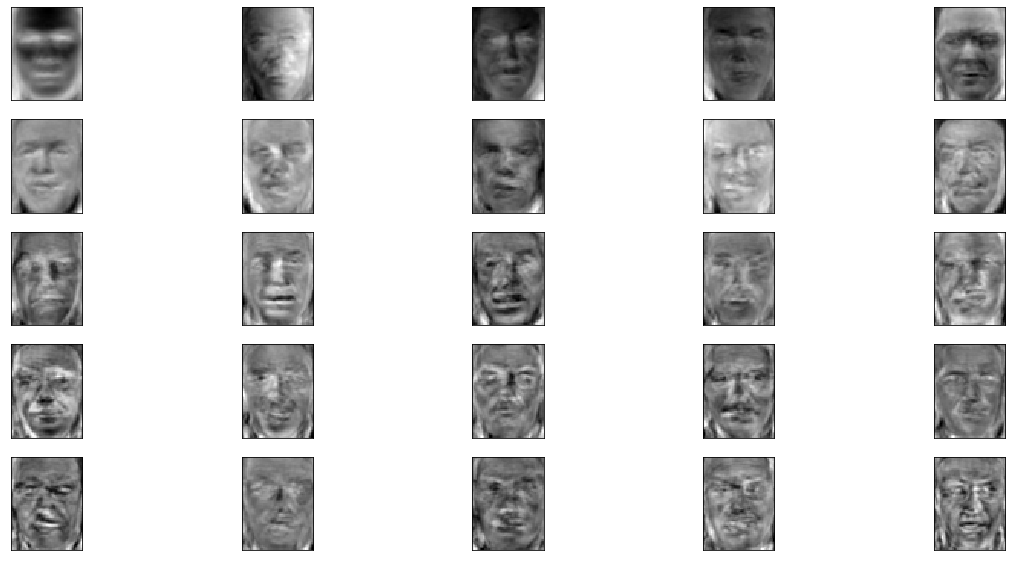

In [8]:
def plot_eigenfaces(images, h, w, rows=5, cols=5):
    plt.figure(figsize=(20,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces(v, h, w)

In [34]:
autovalores, autovetores = np.linalg.eigh(C)
#idxs = np.argsort(-autovalores)
autovalores = np.flip(autovalores)
autovetores = np.flip(autovetores)
print("autovalores")
print("val:", autovalores[:10])
print("val:", s[:10])

print("autovetores")
print("vet:", autovetores[:10])
print("vet:", v[:10])



autovalores
val: [2.7262285e+09 3.4061764e+07 1.9006336e+07 1.4269869e+07 1.1742890e+07
 8.7915180e+06 6.3134720e+06 5.2310435e+06 5.0657225e+06 4.6756150e+06]
val: [2.7262285e+09 3.4061764e+07 1.9006336e+07 1.4269869e+07 1.1742890e+07
 8.7915180e+06 6.3134720e+06 5.2310435e+06 5.0657225e+06 4.6756150e+06]
autovetores
vet: [[ 0.01592886 -0.02219177  0.09286898 ... -0.00376276  0.00834921
  -0.00197866]
 [ 0.0167541  -0.01895309  0.09703887 ...  0.01438183  0.01159583
  -0.01811026]
 [ 0.01680142 -0.01173149  0.0924441  ... -0.00322665 -0.00303049
  -0.00582097]
 ...
 [ 0.01693747  0.00317475  0.04972047 ...  0.00861044  0.00575883
  -0.00772985]
 [ 0.01595631 -0.0033564   0.0387488  ...  0.00217068 -0.00408251
   0.01687086]
 [ 0.014957   -0.00961936  0.02780532 ...  0.01210544  0.0205359
   0.01136108]]
vet: [[-0.01113015 -0.01170804 -0.01246212 ... -0.01680142 -0.0167541
  -0.01592886]
 [-0.02094962 -0.01899809 -0.01817401 ...  0.01173149  0.01895309
   0.02219177]
 [-0.02449677 -0.0

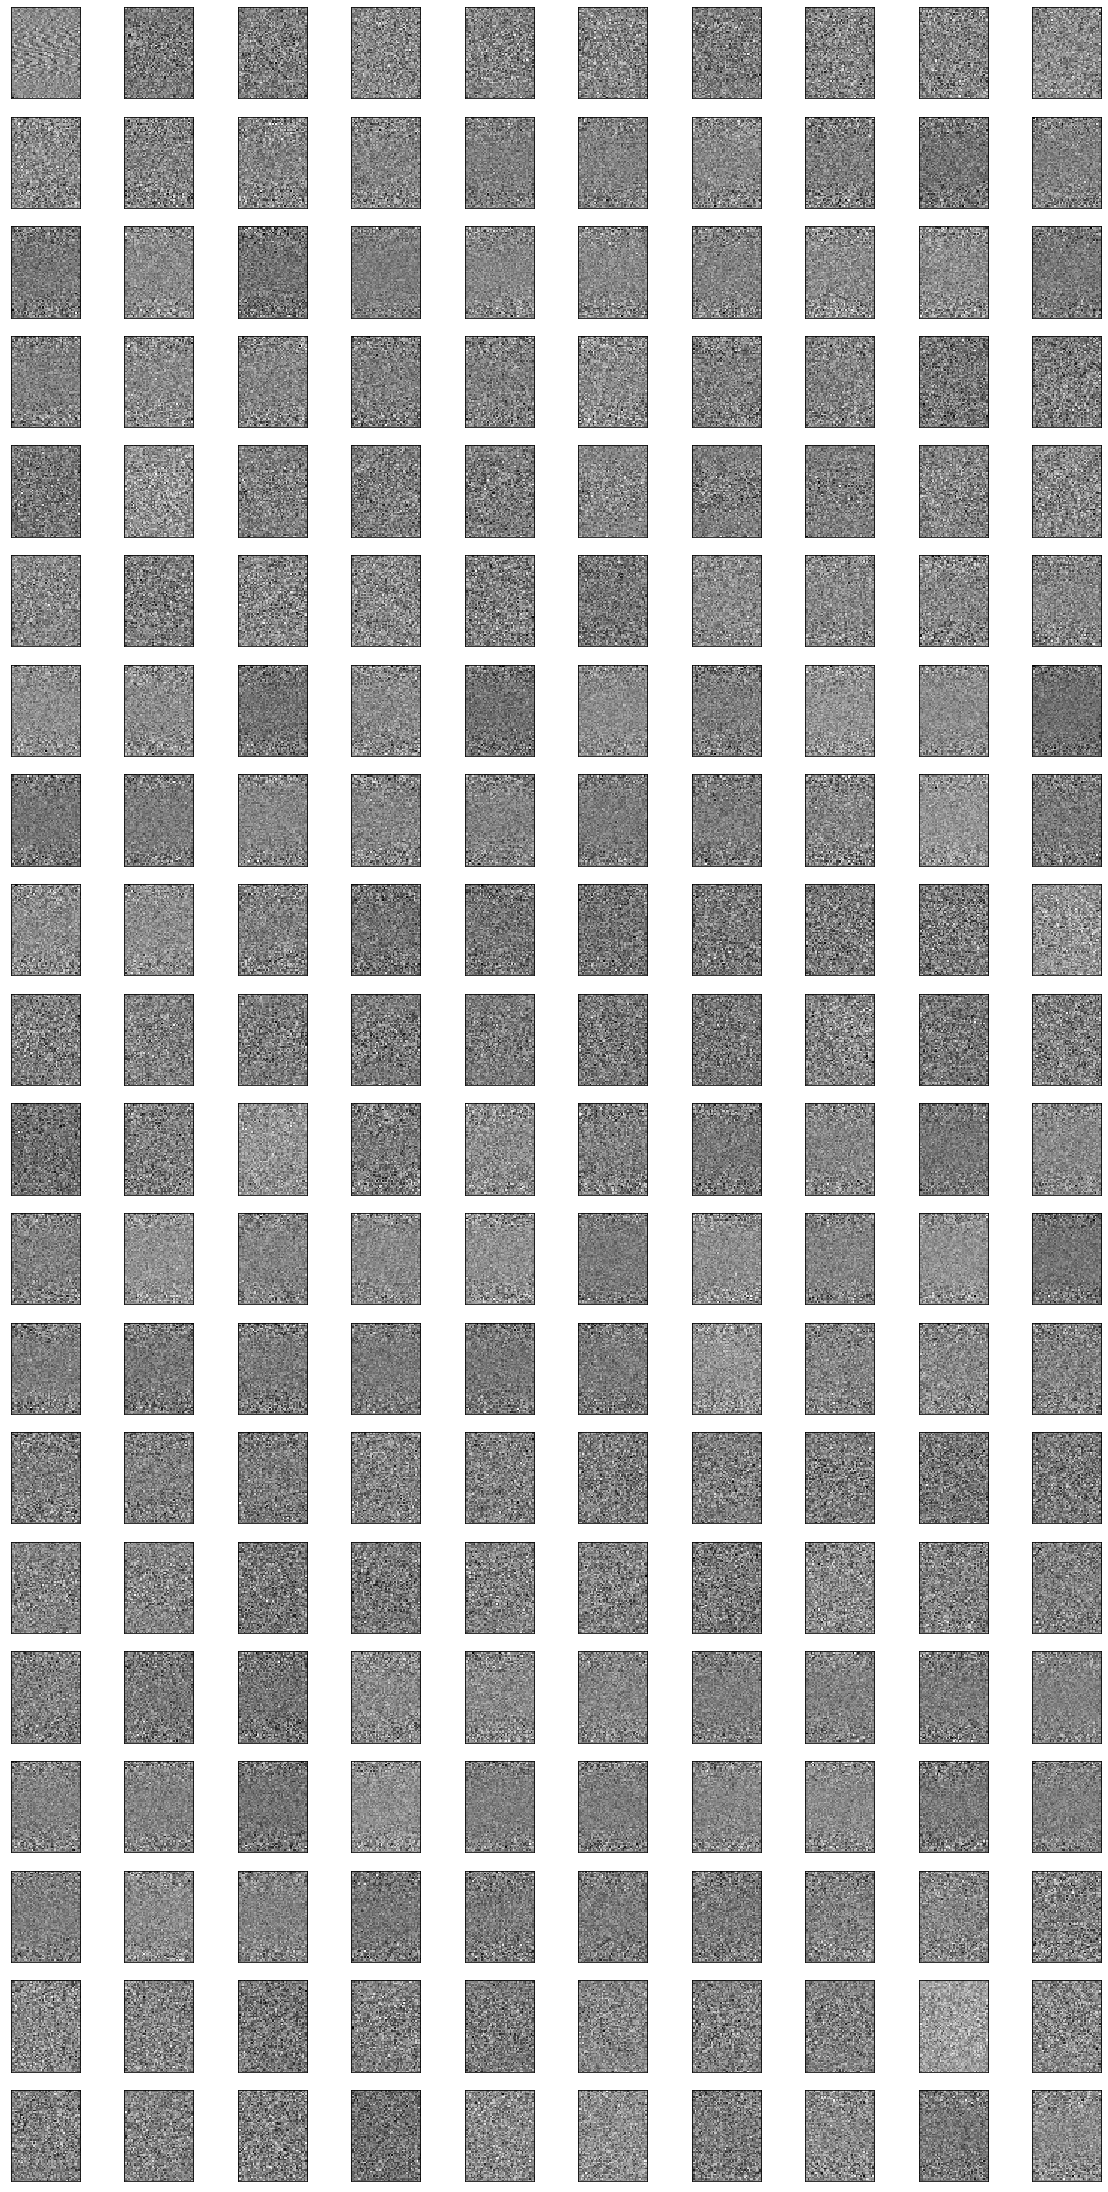

In [22]:
def plot_eigenfaces(images, h, w, rows=20, cols=10):
    plt.figure(figsize=(20,40))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces(autovetores, h, w)